# Fit of `B0_M` with the MC data
- cut on $\Delta M$ : $143 MeV < \Delta M < 148 MeV$
- Double CB fit on the MC data

## Libraries

In [1]:
import numpy as np
import zfit
import matplotlib.pyplot as plt
import json
#Gives us nice LaTeX fonts in the plots
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Roman']})
rc('text', usetex=True)


from bd2dst3pi.locations import loc
from bd2dst3pi.definitions import years, magnets


import sys
sys.path.append(loc.SCRIPTS)
import functions as fct
from fit import launch_fit, plot_hist_fit, save_params

Welcome to JupyROOT 6.22/02


## Retrieve data

In [2]:
df_MC = fct.load_data(years,magnets,type_data = 'MC',vars = ['B0_M'],cut_DeltaM = True, cut_PIDK='ALL')

/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2015_down_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_up_Sim09e-ReDecay01.root
/eos/lhcb/wg/semileptonic/RXcHad/B02Dsttaunu/Run2/ntuples//norm/Bd_Dst3pi/Bd_Dst3pi_11266018_2016_down_Sim09e-ReDecay01.root
cut on Delta_M
cut on all PIDK
cut on all PIDKs have removed 277 over 23724 events


In [3]:
name_data = 'MC_cutallPIDK'

## Plot 1D histograms

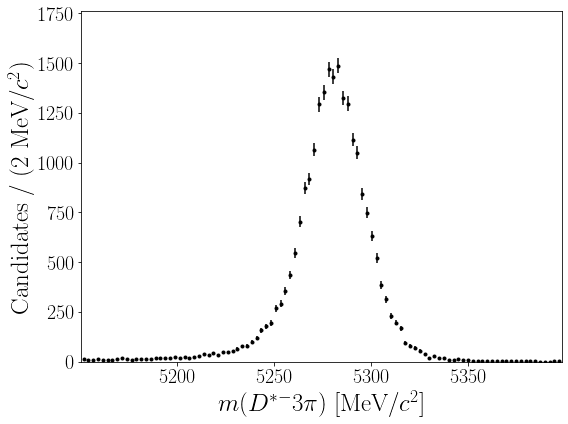

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC_cutallPIDK/B0_M_MC_cutallPIDK.pdf


In [4]:
fct.plot_hist_particle({name_data:df_MC},'B0_M', n_bins = 100, name_folder = name_data, colors='black')

## A function to launch the fit

This function has been implemented in `scripts/fit.py`

## Double CB Fit of `B0_M` of the MC data

In [5]:
low = 5050.
high = 5550.
obs = zfit.Space("x", limits=(low, high))

In [6]:
# name         value    minuit_hesse         minuit_minos    at limit
# ---------  -------  --------------  -------------------  ----------
# alphaL_MC    1.332     +/-   0.033  -  0.034   +  0.036       False
# nL_MC        1.636     +/-   0.059  -  0.066   +  0.073       False
# mu_MC         5281     +/-    0.13  -   0.13   +   0.13       False
# alphaR_MC    4.243     +/-    0.27  -   0.27   +   0.29       False
# nR_MC        10.61     +/-     2.1  -    2.1   +    2.9       False
# sigma_MC     14.84     +/-    0.15  -   0.16   +   0.16       False
mu_MC = zfit.Parameter("mu_MC", 5280., 5277., 5283.)
sigma_MC = zfit.Parameter("sigma_MC", 14.8, 12., 17.)
alphaL_MC = zfit.Parameter("alphaL_MC", 1.33, 0.1, 5.)
alphaR_MC = zfit.Parameter("alphaR_MC", 4.2, 0.1, 5.)
nL_MC = zfit.Parameter("nL_MC", 1.64, 1., 4.)
nR_MC = zfit.Parameter("nR_MC", 10.6, 5., 15.)


In [7]:
name_params = {
    'mu_MC':'$\mu$',
    'sigma_MC':'$\sigma$',
    'alphaL_MC':'$\\alpha_L$',
    'alphaR_MC':'$\\alpha_R$',
    'nL_MC':'$n_L$',
    'nR_MC':'$n_R$',
}

In [8]:
doubleCB_MC = zfit.pdf.DoubleCB(mu_MC, sigma_MC, alphaL_MC, alphaR_MC, nL_MC, nR_MC, obs=obs)
data_MC = zfit.Data.from_pandas(df_MC['B0_M'],obs=obs)

In [9]:
result, params = launch_fit(doubleCB_MC, data_MC)

------------------------------------------------------------------
| FCN = 1.03e+05                |     Ncalls=195 (195 total)     |
| EDM = 0.000626 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
name         value    minuit_hesse         minuit_minos    at limit
---------  -------  --------------  -------------------  ----------
alphaL_MC    1.332     +/-   0.033  -  0.034   +  0.036     

/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:392: UserWarning: The function <function Space.limits at 0x7f62ba73c3b0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/scripts/fit.py:35: UserWarning: The function <function Space.area at 0x7f62ba7427a0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5050.]]), array([[5550.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  return counts.sum() * obs.area() / n_bins


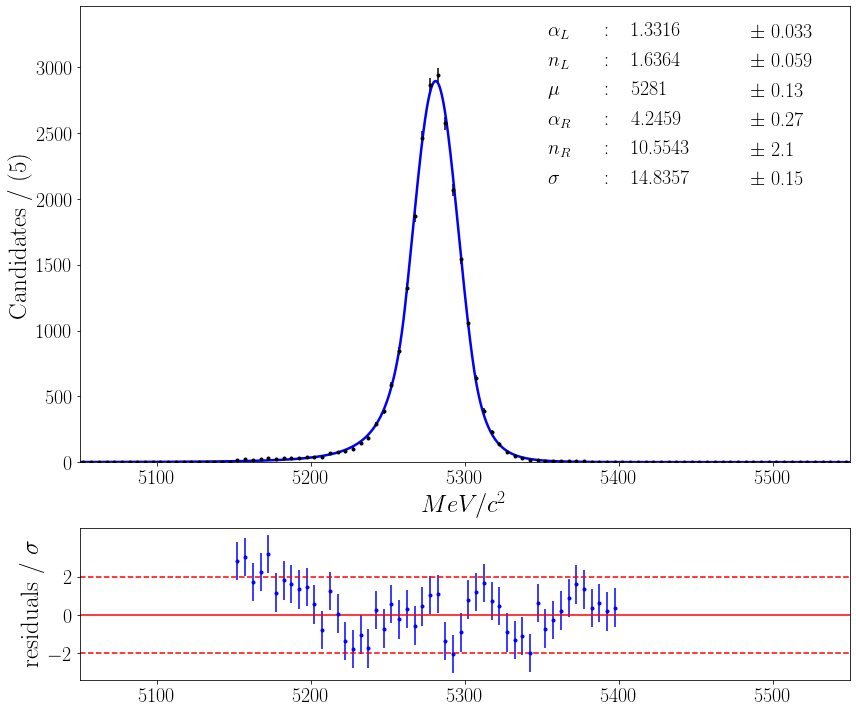

/afs/cern.ch/user/c/correian/bd2dst3pi/output/plots/MC_cutallPIDK/B0_M_MC_cutallPIDK_fit.pdf


In [10]:
plot_hist_fit(df_MC,'B0_M','$MeV/c^2$',models = doubleCB_MC, obs=obs, n_bins = 100,mode_hist = False,
              name_folder = name_data,name_data = name_data,params=params,name_params=name_params)   

In [11]:
save_params(params, name_data, True)

parameters saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/json/MC_cutallPIDK_params.json
